In [156]:
import numpy as np
import pandas as pd
from sklearn import tree,preprocessing

In [160]:
data=pd.read_excel('bank.xlsx',sheet_name='Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [162]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [164]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [166]:
features=pd.DataFrame([data["Age"], data['Income'], data["Experience"]]).T
features.head()

,Age,Income,Experience
0,25,49,1
1,45,34,19
2,39,11,15
3,35,100,9
4,35,45,8


In [168]:
model=DecisionTreeClassifier()
model.fit(X=features, y=data["Personal Loan"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [172]:
with open('Btree.dot','w') as f:
  f=tree.export_graphviz(model, feature_names=["Age", 'Income', "Experience"], out_file=f);

[Text(141.2638020512623, 213.0912, 'X[1] <= 113.5\ngini = 0.174\nsamples = 5000\nvalue = [4520, 480]'),
 Text(42.749362684729064, 204.3936, 'X[1] <= 92.5\ngini = 0.041\nsamples = 4021\nvalue = [3937, 84]'),
 Text(19.662284482758622, 195.696, 'X[1] <= 82.5\ngini = 0.014\nsamples = 3638\nvalue = [3613, 25]'),
 Text(10.070800492610838, 186.9984, 'X[1] <= 63.5\ngini = 0.005\nsamples = 3272\nvalue = [3263, 9]'),
 Text(6.102266009852217, 178.3008, 'X[0] <= 26.5\ngini = 0.001\nsamples = 2490\nvalue = [2489, 1]'),
 Text(5.44256157635468, 169.60320000000002, 'X[1] <= 59.5\ngini = 0.024\nsamples = 83\nvalue = [82, 1]'),
 Text(4.782857142857143, 160.9056, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(6.102266009852217, 160.9056, 'X[1] <= 60.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(5.44256157635468, 152.208, 'X[2] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(4.782857142857143, 143.5104, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(6.102266009852217, 143.5104, 

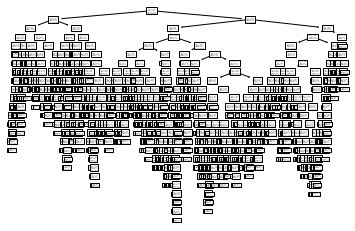

In [175]:
tree.plot_tree(model)

In [182]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=1000, oob_score=True)
model_rf.fit(X=features, y=data['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
print("The oob score ", model_rf.oob_score_)

The oob score  0.9002


In [186]:
for feature,imp in zip(features, model_rf.feature_importances_):
  print(feature,imp)

Age 0.15447964670879258
Income 0.6956770818351674
Experience 0.14984327145604004
